In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [133]:
data=pd.read_csv('../../database/automobile.csv')
print(f'the head of the data is\n{data.head()}\n the shape of the data is:{data.shape}')


the head of the data is
    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         m

In [134]:
print(data.describe())


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [135]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    symboling         205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# For this dataset 
we are going to require more about the cars by itself, therefore, it is required to acquire the data that we don't know. But first. it'll be useful to check where are the nans.
At the moment that we know where's the data, therefore it'll be useful to check it out y subjoints of cars, would it be interesting to check by models or ome categorical
It'll be important to check each type of data. May be we are going to require to translate the values of the car to check some plots. And also it' ll be important to look out the categorical variables.
Also, it is important some histogramas of all of the type of data, at least with the categorical

In [136]:
data.replace('?', np.nan, inplace=True)
print(data)

      symboling normalized-losses         make fuel-type aspiration  \
0             3               NaN  alfa-romero       gas        std   
1             3               NaN  alfa-romero       gas        std   
2             1               NaN  alfa-romero       gas        std   
3             2               164         audi       gas        std   
4             2               164         audi       gas        std   
..          ...               ...          ...       ...        ...   
200          -1                95        volvo       gas        std   
201          -1                95        volvo       gas      turbo   
202          -1                95        volvo       gas        std   
203          -1                95        volvo    diesel      turbo   
204          -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

We've cleand some data and changed the type of the variable to our convenience. Now, let's check i fwe have duplicated

In [137]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['highway-mpg']=data['highway-mpg'].astype(float)
data['price     ']=data['price     '].astype(float)

In [138]:

conteo_filas_duplicadas = data.duplicated().sum()
print(conteo_filas_duplicadas)
#print(duplicated)


0


Let's check a correlation map


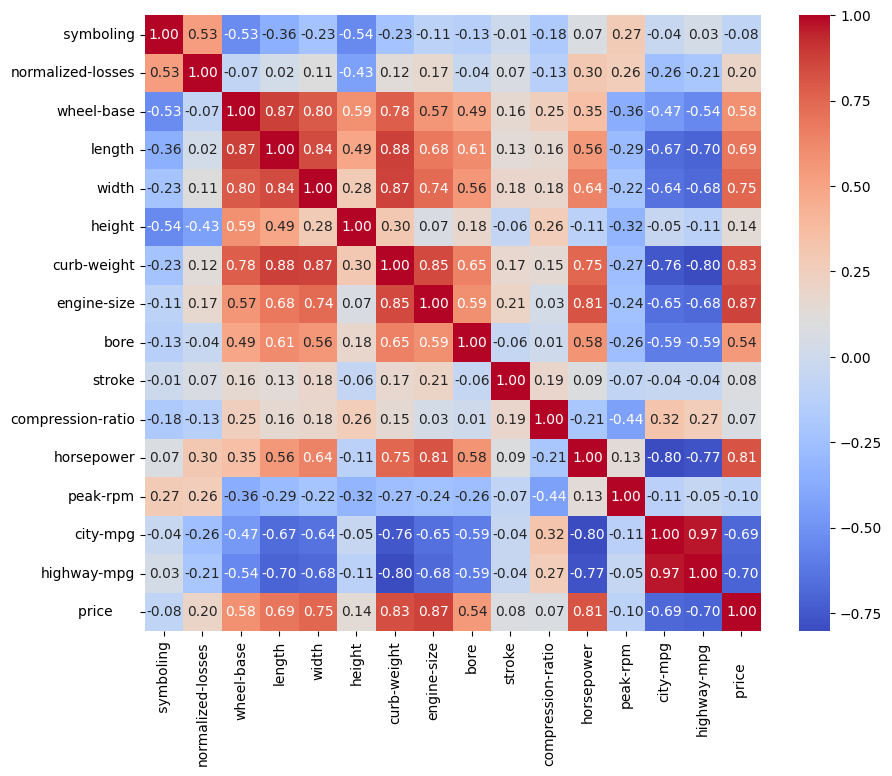

In [139]:
df_numerico = data.select_dtypes(include=[int, float]) #with just numerical data
matriz_correlacion = df_numerico.corr()
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Mostrar el gráfico
plt.show()

# Other step to check, it'll be useful to see how the plots are working on

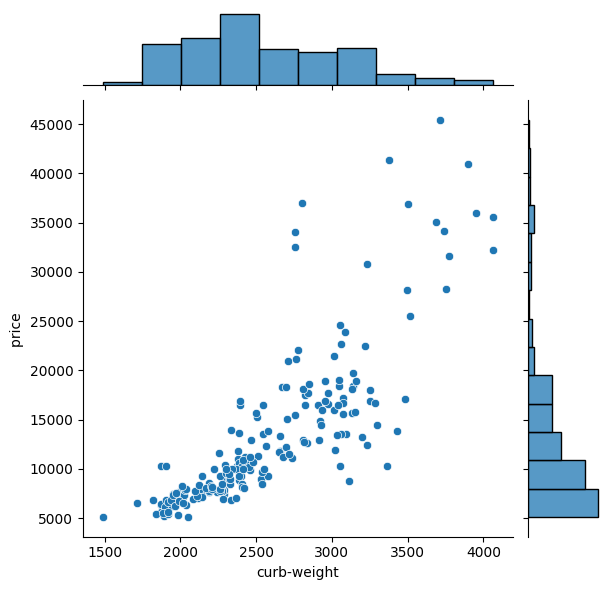

In [179]:
sns.jointplot(x='curb-weight', y='price     ', data=data)

Let's make some exploratory data withsome plots and skewness


In [140]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Treatment for symboling
Let's check the lack of data on eac column to maake able the analysis

In [141]:
data[data[' symboling'].isnull()]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


There were no lack of data in the column symboling

In [142]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26.0,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25.0,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25.0,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22.0,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25.0,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22.0,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22.0,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20.0,36880.0


skew=  0.7659764175950632
mean= 122.0
median= 115.0


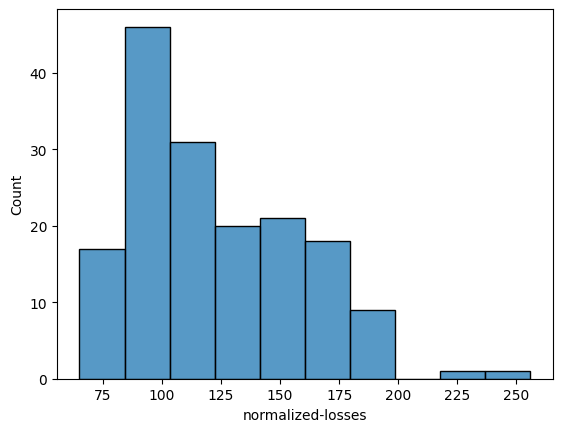

In [143]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

data['normalized-losses']=data['normalized-losses'].replace(np.nan,data['normalized-losses'].median())

skew=  0.9761135438633949
mean= 120.6
median= 115.0


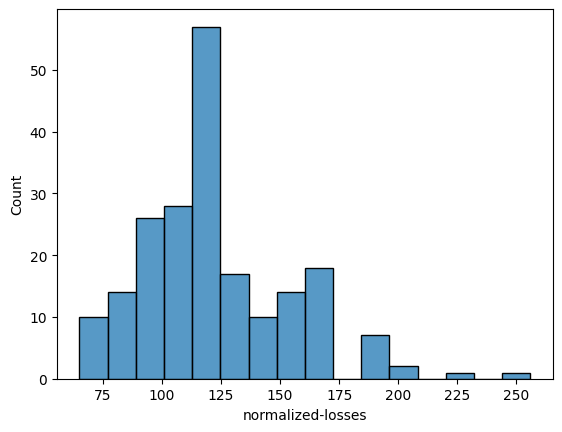

In [144]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

|parameter\value|before|median|150|
|-------|----|----|---|
|skew|0.7659764175950632| 0.9761135438633949|0.3236915397985183|
|mean|122.0|120.6|127.6|
|median|115.0|115.0|128.0|

# Let's check the next columns
However it'll be useful to check by now what happens when we use those columns that have a stronger correlation among the price, so let's check it
* highway-mpg data complete
* city-mpg data complete
* horsepower 2 values missing
* engine-size 0 values missing
* curb weight 0 values missing
* width  0 values missing
* length  0 values missing
* price 4 values missing

In [149]:
data[data['price     '].isnull()]
data['price     ']=data['price     '].replace(np.nan,data['price     '].median())
print("skew",data['price     '].skew())


skew 1.8409793088634683


In [150]:
print(data['price     '].describe())
print("skew",data['price     '].skew())
print(data[])

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price     , dtype: float64
skew 1.8409793088634683


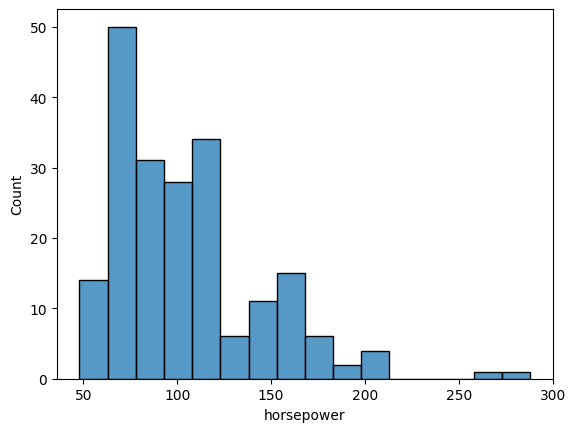

In [166]:
sns.histplot(data,x=data['horsepower'])
data['horsepower']=data['horsepower'].replace(np.nan,data['horsepower'].median())

In [163]:
data[data['horsepower'].isnull()]
data['horsepower'].describe()

np.float64(2.6232797942177686)

# Let's try the CV 5x2 into our problem just to check, what happens if we are making the regression

Mean R^2: 0.6807580586382043
MSE:  0.07755172774333993
Slope: [[1.3966245]]
Intercept: [2.61740624]


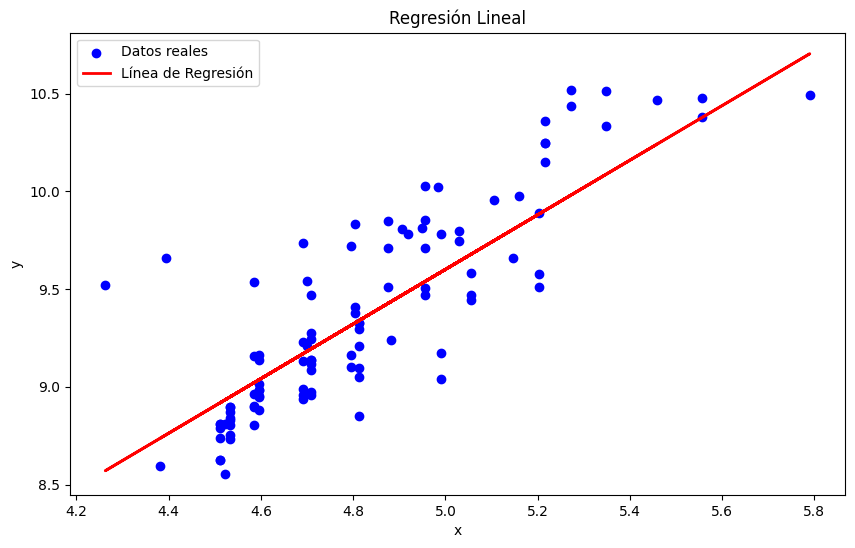

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
model = LinearRegression() 
mse_scores = []
r2_scores = []
X=np.log(data['engine-size']+1).to_frame()
Y=np.log(data['price     ']+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.6107334082588141
MSE:  0.09534074682197988
Slope: [[-1.47121358]]
Intercept: [14.0954532]


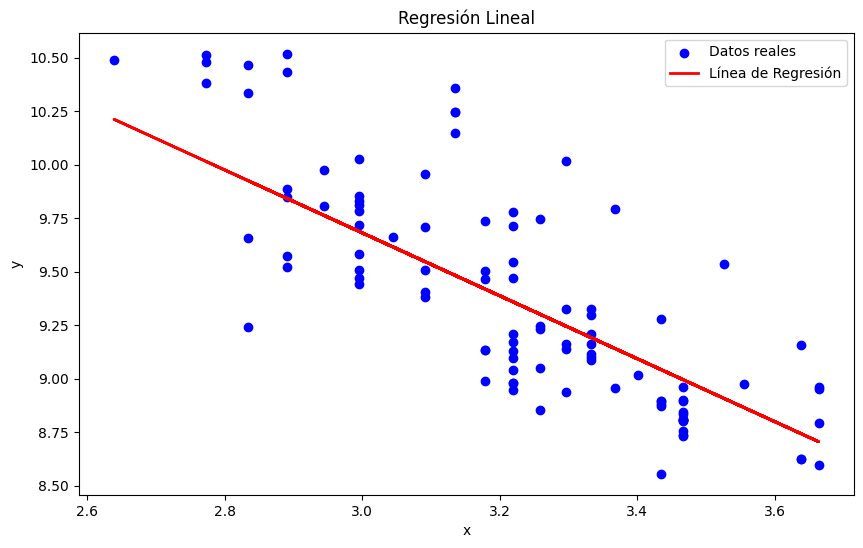

In [177]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=np.log(data['city-mpg']+1).to_frame()
Y=np.log(data['price     ']+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.751558381412812
MSE:  0.059655097824920914
Slope: [[2.05927629]]
Intercept: [-6.78024606]


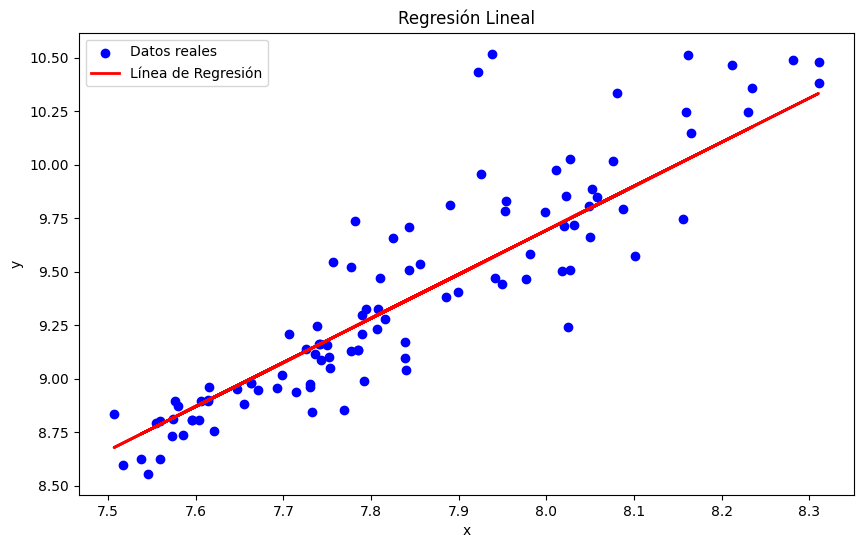

In [178]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=np.log(data['curb-weight']+1).to_frame()
Y=np.log(data['price     ']+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()